###PROJECT : Classification of Radio Signals from Outer Space with Keras

In [0]:
# used 2d spectrograms of deep space radio signals collected by antennas at SETI (search for extraterrestrial intelligence) in
# Northern Claifornia.
# data - collected from official SETI website in the form of time series data - converted to images explicitly to apply CNN
# Allen telescope is used at SETI to scan the night sky for faint radio signals that come from outer space.
# image classification model using 2d spectrogram images in realtime
# 4 target categories - 

##Import Libraries

In [3]:
!pip install livelossplot

In [4]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 41kB/s 
     |████████████████████████████████| 3.9MB 30.1MB/s 
     |████████████████████████████████| 450kB 42.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=da2133fb852c1e7e08eef6cdf830c1f66fcf5b6eb9d36f008eddd304c6f9b802
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [5]:
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.1.0


##Load and Preprocess SETI Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_images = pd.read_csv("/content/drive/My Drive/seti dataset/train/images.csv", header = None)
train_labels = pd.read_csv("/content/drive/My Drive/seti dataset/train/labels.csv", header = None)

val_images = pd.read_csv("/content/drive/My Drive/seti dataset/validation/images.csv", header = None)
val_labels = pd.read_csv("/content/drive/My Drive/seti dataset/validation/labels.csv", header = None)

In [8]:
train_images.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,0.729412,0.725490,0.619608,0.674510,0.643137,0.705882,0.713726,0.658824,0.615686,0.690196,0.654902,0.525490,0.556863,0.541176,0.482353,0.588235,0.615686,0.600000,0.603922,0.627451,0.678431,0.658824,0.698039,0.576471,0.678431,0.686275,0.690196,0.705882,0.705882,0.643137,...,0.650980,0.666667,0.666667,0.709804,0.682353,0.682353,0.682353,0.658824,0.682353,0.643137,0.627451,0.623529,0.650980,0.721569,0.627451,0.635294,0.709804,0.690196,0.678431,0.647059,0.658824,0.682353,0.654902,0.694118,0.741176,0.678431,0.662745,0.729412,0.694118,0.647059,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,0.678431,0.709804,0.713726,0.686275,0.717647,0.713726,0.694118,0.690196,0.721569,0.701961,0.698039,0.713726,0.705882,0.756863,0.756863,0.694118,0.650980,0.674510,0.752941,0.725490,0.725490,0.760784,0.678431,0.717647,0.725490,0.682353,0.709804,0.729412,0.721569,0.717647,...,0.686275,0.670588,0.713726,0.733333,0.725490,0.694118,0.694118,0.686275,0.674510,0.729412,0.721569,0.701961,0.682353,0.709804,0.756863,0.698039,0.729412,0.721569,0.674510,0.698039,0.725490,0.733333,0.666667,0.682353,0.701961,0.737255,0.745098,0.725490,0.698039,0.650980,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,0.690196,0.670588,0.662745,0.666667,0.713726,0.701961,0.721569,0.713726,0.662745,0.698039,0.682353,0.639216,0.717647,0.658824,0.674510,0.639216,0.643137,0.635294,0.654902,0.682353,0.639216,0.733333,0.690196,0.658824,0.686275,0.658824,0.690196,0.698039,0.709804,0.650980,...,0.533333,0.572549,0.537255,0.549020,0.670588,0.690196,0.670588,0.643137,0.662745,0.713726,0.717647,0.721569,0.709804,0.674510,0.709804,0.686275,0.658824,0.694118,0.698039,0.694118,0.678431,0.678431,0.690196,0.662745,0.650980,0.650980,0.686275,0.631373,0.666667,0.701961,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510


In [9]:
train_labels.head(3) # labels stored as one hot encoded values
# SIGNAL TYPES
# category 0 - squiggle
# category 1 - narrowband
# category 2 - noise
# category 3 - narrowbanddrd

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0


In [10]:
print("Training set shape : ",train_images.shape, train_labels.shape)
print("Validation set shape : ", val_images.shape, val_labels.shape)

Training set shape :  (3200, 8192) (3200, 4)
Validation set shape :  (800, 8192) (800, 4)


In [0]:
x_train = train_images.values.reshape(3200, 64, 128, 1) # data is given as an array of 8192 pixels - convert to 64 X 128 2d image
x_val = val_images.values.reshape(800, 64, 128, 1 )

y_train = train_labels.values
y_val = val_labels.values

##Plot 2D Spectrograms

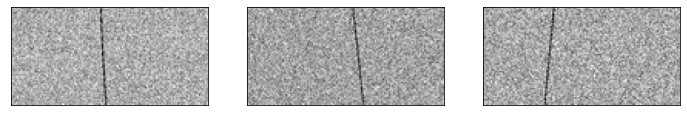

In [12]:
plt.figure(0, figsize = (12, 12))
for i in range(1, 4):
  plt.subplot(1, 3, i)
  img = np.squeeze(x_train[np.random.randint(0, x_train.shape[0])]) # squeeze reduces any additional axes - here, last color channel
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap = 'gray')

##Create Training and Validation Data Generators

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(horizontal_flip = True) # data augmentation
datagen_train.fit(x_train)

datagen_val = ImageDataGenerator(horizontal_flip = True)
datagen_val.fit(x_val)

In [0]:
ImageDataGenerator?

##Creating the CNN Model

In [0]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
model = Sequential()
# 1st Convolution
model.add(Conv2D(32, (5,5), padding='same', input_shape = (64, 128, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4, activation='softmax'))

##Learning Rate Scheduling and Compile the Model

In [0]:
initial_learning_rate = 0.005
# use a scheduler that exponentially decays the learning rate
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = initial_learning_rate,
    decay_steps = 5,
    decay_rate = 0.96,
    staircase = True
)
optimizer = Adam(learning_rate=lr_schedule)

In [0]:
model.compile(optimizer = optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

##Training the Model

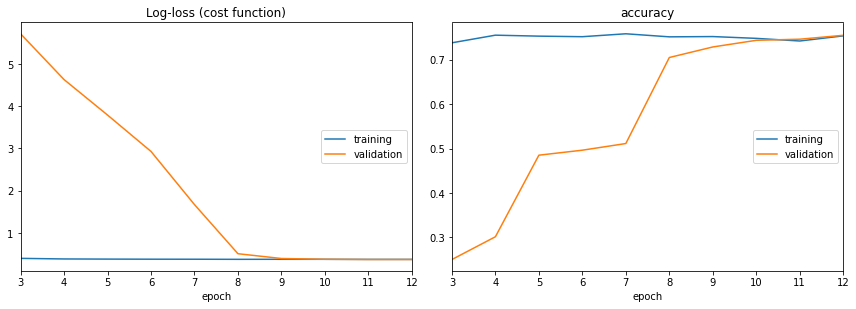

Log-loss (cost function):
training   (min:    0.370, max:    0.606, cur:    0.371)
validation (min:    0.368, max:    5.715, cur:    0.368)

accuracy:
training   (min:    0.688, max:    0.758, cur:    0.754)
validation (min:    0.250, max:    0.755, cur:    0.755)
100/100 [==============================] - 2s 25ms/step - loss: 0.3706 - accuracy: 0.7538 - val_loss: 0.3680 - val_accuracy: 0.7550


In [20]:
checkpoint = ModelCheckpoint('model_weight.h5', monitor = 'val_loss', save_weights_only = True, mode = 'min', verbose=0)
callbacks = [PlotLossesCallback() , checkpoint]
# plotlossescallback() - alternative to tensorboard - shows results in notebook itself
batch_size = 32
history = model.fit(
    datagen_train.flow(x_train, y_train, batch_size = batch_size, shuffle = True),
    steps_per_epoch = len(x_train) // batch_size,
    validation_data = datagen_val.flow(x_val, y_val, batch_size = batch_size, shuffle = True),
    validation_steps = len(x_val) // batch_size,
    epochs = 12,
    callbacks = callbacks
)

##Model Evaluation

In [21]:
model.evaluate(x_val, y_val)

800/800 [==============================] - 0s 401us/sample - loss: 0.3676 - accuracy: 0.7475


[0.3675539384331205, 0.7475]

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true = np.argmax(y_val, 1)
y_pred = np.argmax(model.predict(x_val), 1)
print(metrics.classification_report(y_true, y_pred))
# model does really well on classes 0 and 3 (98% and 100% recall respectively)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       200
           1       0.49      0.13      0.21       200
           2       0.50      0.88      0.64       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.71       800
weighted avg       0.75      0.75      0.71       800



In [23]:
metrics.accuracy_score(y_true, y_pred)

0.7475